In [283]:
# 1. 데이터 로드
# 2. 데이터 구조 및 기초 통계 확인
# 3. 결측치 및 이상치 탐색
# 4. 데이터 시각화를 통한 탐색
# 5. 데이터 정제 및 전처리
# 6. 데이터 변환 및 피처 엔지니어링
# 7. 데이터 분할

# 1. 데이터 로드
# 2. 데이터 구조 및 기초 통계 확인
# 3. 결측치 및 이상치 탐색
# 4. 데이터 정제 및 전처리 (1차)
# 5. 데이터 시각화를 통한 탐색
# 6. 데이터 정제 및 전처리 (2차)
# 7. 데이터 변환 및 피처 엔지니어링
# 8. 데이터 분할

In [284]:
# 문자열 비교를 위한 설치
# !pip install fuzzywuzzy python-Levenshtein

# # EDA

- [팀 노션](https://www.notion.so/3-27db306ac5a680b199fcf831b838cd25)
- [팀 깃허브](https://github.com/SKNetworks-AI19-250818/SKN19_2ND_3TEAM)
- [데이터 출처](https://github.com/JackBrowne556/Netflix-Churn-Project)

## ## 0. 초기화

In [285]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 문자열 비교 및 대체 용도
from fuzzywuzzy import fuzz
from fuzzywuzzy import process


# pandas 출력 옵션
pd.set_option('display.float_format', '{:.2f}'.format)

# # 전체 행 출력을 위한 pandas 옵션 설정
# pd.set_option('display.max_rows', None)  # 모든 행 출력


# # # 출력 후 기본값으로 복원 (선택사항)
# pd.reset_option('display.max_rows')

In [286]:
# 한글 폰트 사용을 위한 설정
import matplotlib.font_manager as fm
import matplotlib

font_path = 'C:\\Windows\\Fonts\\gulim.ttc'
font = fm.FontProperties(fname=font_path).get_name()
matplotlib.rc('font', family=font)

## ## 1. 데이터 로드

In [287]:
df = pd.read_csv('./data/netflix_user_data_unclean.csv')

In [288]:
# 컬럼 ID - 설명 매핑
rename_map = {
    "Customer ID": "고객번호",
    "Subscription Length (Months)": "구독기간_개월",
    "Customer Satisfaction Score (1-10)": "고객만족도_1_10",
    "Daily Watch Time (Hours)": "일일시청시간_시간",
    "Engagement Rate (1-10)": "참여도_1_10",
    "Device Used Most Often": "주이용기기",
    "Genre Preference": "선호장르",
    "Region": "지역",
    "Payment History (On-Time/Delayed)": "결제이력_정시_지연",
    "Subscription Plan": "구독플랜",
    "Churn status": "이탈여부",
    "Support Queries Logged": "지원문의_건수",
    "Age": "나이",
    "Monthly Income ($)": "월소득_달러",
    "Promotional Offers Used": "프로모션_사용",
    "Number of Profiles Created": "생성프로필수"
}

## ## 2. 데이터 구조 및 기초 통계 확인


- 결과
  - 총 16개 컬럼
  - 전체 컬럼에서 결측치 확인
  - 중복행 1,445건 확인 - 중복제거 필요

In [289]:
# 전체 구조 확인
print(df.info())

"""
0   Customer ID                         119,378 object  # 🆎 문자형, 결측치: 401
1   Subscription Length (Months)        119,379 object  # 🔢 숫자형, 결측치: 400
2   Customer Satisfaction Score (1-10)  119,369 object  # 🔢 숫자형, 결측치: 410
3   Daily Watch Time (Hours)            119,352 object  # 🔢 숫자형, 결측치: 427
4   Engagement Rate (1-10)              119,354 object  # 🔢 숫자형, 결측치: 425
5   Device Used Most Often              119,332 object  # 🆎 문자형, 결측치: 447
6   Genre Preference                    119,342 object  # 🆎 문자형, 결측치: 437
7   Region                              119,380 object  # 🆎 문자형, 결측치: 399
8   Payment History (On-Time/Delayed)   119,330 object  # 🆎 문자형, 결측치: 449
9   Subscription Plan                   119,383 object  # 🆎 문자형, 결측치: 396
10  Churn status                        119,391 object  # 🆎 문자형, 결측치: 388
11  Support Queries Logged              119,349 object  # 🔢 숫자형, 결측치: 430
12  Age                                 118,542 float64 # 🔢 숫자형, 결측치: 1237
13  Monthly Income ($)                  119,360 object  # 🔢 숫자형, 결측치: 419
14  Promotional Offers Used             119,336 object  # 🔢 숫자형, 결측치: 443
15  Number of Profiles Created          119,381 object  # 🔢 숫자형, 결측치: 398


"""

# 구조 확인 2
display(df.head(5))

# 중복행 확인
print("\n중복행: ", df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119779 entries, 0 to 119778
Data columns (total 16 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Customer ID                         119378 non-null  object 
 1   Subscription Length (Months)        119379 non-null  object 
 2   Customer Satisfaction Score (1-10)  119369 non-null  object 
 3   Daily Watch Time (Hours)            119352 non-null  object 
 4   Engagement Rate (1-10)              119354 non-null  object 
 5   Device Used Most Often              119332 non-null  object 
 6   Genre Preference                    119342 non-null  object 
 7   Region                              119380 non-null  object 
 8   Payment History (On-Time/Delayed)   119330 non-null  object 
 9   Subscription Plan                   119383 non-null  object 
 10  Churn status                        119391 non-null  object 
 11  Support Queries Logged    

,Customer ID,Subscription Length (Months),Customer Satisfaction Score (1-10),Daily Watch Time (Hours),Engagement Rate (1-10),Device Used Most Often,Genre Preference,Region,Payment History (On-Time/Delayed),Subscription Plan,Churn status,Support Queries Logged,Age,Monthly Income ($),Promotional Offers Used,Number of Profiles Created
0,C000001,12,10,4.85,4,Tablet,Action,Europe,On-Time,Basic,Yes,10,33.00,6250,5,2
1,C000002,12,8,1.75,9,Laptop,Thriller,Europe,On-Time,Basic,Yes,9,28.00,7018,1,5
2,C000003,3,4,2.75,9,Smart TV,Comedy,Asia,On-Time,Premium,Yes,3,18.00,1055,1,5
3,C000004,3,7,3,9,Smart TV,Drama,Europe,Delayed,Premium,Yes,5,32.00,6707,5,4
4,C000005,24,2,1.37,5,Mobile,Drama,North America,On-Time,Standard,Yes,2,59.00,1506,3,5



중복행:  1445


## ## 3. 결측치 및 이상치 탐색

### ### 1. Customer ID - 고객번호

- 결과
  - 정상 데이터의 경우 C123456(C + 숫자6자리) 형식을 가지고 감
  - 이상치 사례들
    - NaN
    - '###'
    - z014464
    - y117407
    - x065493
    - Cz76729
  - 결측치와 이상치를 처리하는 방법에 대해서 논의 필요

- 의견
  - 결측치, 이상치를 모두 공백화 하고 새로운 코드 부여
    - 재활용 가능

In [290]:
# 결측치 있음
print(df['Customer ID'].isna().sum())

# 이상치 있음
df['Customer ID'].sort_values()

401


60887     ###
37394     ###
37469     ###
37884     ###
37897     ###
         ... 
117004    NaN
118253    NaN
118822    NaN
119056    NaN
119721    NaN
Name: Customer ID, Length: 119779, dtype: object

In [291]:
def displayCountNonNumeric(df, col_name, show_all=False):
    """
    숫자로 예상되는 컬럼의 숫자가 아닌 데이터를 노출한다.
    """
    # 1. 숫자로 변환될 수 없는 값은 NaN으로 강제 변환
    numeric_series = pd.to_numeric(df[col_name], errors='coerce')

    # 2. 숫자로 변환된 값(NaN이 아님)과 원래 NaN이 아닌 값(문자열 등)을 구분
    # True: 숫자가 아니거나, 공백이거나, 원래 NaN이었던 값
    non_numeric_mask = numeric_series.isna()

    # 3. 원본 데이터프레임에서 숫자가 아닌 행만 필터링
    non_numeric_data = df[non_numeric_mask]

    # 4. value_counts()를 사용하여 빈도수를 계산하되,
    #    NaN 값도 결과에 포함시키도록 dropna=False 설정
    df_result = non_numeric_data[col_name].value_counts(dropna=False).reset_index()

    # 컬럼 이름 변경
    df_result.columns = [col_name, 'Count']

    if show_all:
        # 전체 행 출력을 위한 pandas 옵션 설정
        pd.set_option('display.max_rows', None)  # 모든 행 출력
    # 5. 결과 출력
    display(df_result)

    if show_all:
        # # 출력 후 기본값으로 복원 (선택사항)
        pd.reset_option('display.max_rows')

def displayPatterns(df, col, show_all=False):
    """
    문자열 컬럼 데이터 분포 보기
    """
    if show_all:
        # 전체 행 출력을 위한 pandas 옵션 설정
        pd.set_option('display.max_rows', None)  # 모든 행 출력


    df_result = df[col].value_counts().reset_index()
    print(df_result)

    if show_all:
        # # 출력 후 기본값으로 복원 (선택사항)
        pd.reset_option('display.max_rows')

def fuzzy_match_and_clean(wrong_value, allowed_values, THRESHOLD = 80):
    """
    주어진 오류 값(wrong_value)를 허용 목록(allowed_values)과 비교하여
    유사도가 임계값(THRESHOLD) 이상이면 가장 유사한 값으로 대체합니다.
    """
    if wrong_value in allowed_values or pd.isna(wrong_value) or wrong_value == '':
        return wrong_value
    
    # process.extractOne: 목록에서 가장 유사한 항목 1개를 찾아냄
    # 결과: ('가장 유사한 장르', 유사도 점수)
    best_match = process.extractOne(wrong_value, allowed_values)
    
    match_value = best_match[0]
    score = best_match[1]
    
    if score >= THRESHOLD:
        # 유사도 점수가 높으면 정상 장르로 대체
        return match_value
    else:
        # 유사도 점수가 낮으면(너무 다른 단어이면) np.nan 등으로 남겨서 후속 처리를 유도
        return wrong_value

### ### 2. Subscription Length (Months) - 구독기간_개월

- 결과
  - 숫자를 제외한 컬럼들은 모두 결측치 처리 필요

In [292]:
displayCountNonNumeric(df, 'Subscription Length (Months)')

,Subscription Length (Months),Count
0,NaN,400
1,###,396
2,2z,21
3,2y,18
4,2x,18
5,x4,18
6,x2,15
7,1x,15
8,1y,13
9,z4,11


### ### 3. Customer Satisfaction Score (1-10) - 고객만족도_1_10

- 결과
  - 숫자를 제외한 컬럼들은 모두 결측치 처리 필요

In [293]:
displayCountNonNumeric(df, 'Customer Satisfaction Score (1-10)')

,Customer Satisfaction Score (1-10),Count
0,NaN,410
1,1z,13
2,x0,10
3,1x,9
4,z0,8
5,y0,4
6,1y,3


### ### 4. Daily Watch Time (Hours) - 일일시청시간_시간

- 결과
  - 숫자를 제외한 컬럼들은 모두 결측치 처리 필요

In [294]:
displayCountNonNumeric(df, 'Daily Watch Time (Hours)')

,Daily Watch Time (Hours),Count
0,###,432
1,NaN,427
2,z.12,4
3,2.y8,4
4,1.2y,4
...,...,...
343,3x99,1
344,x.18,1
345,2.0x,1
346,y.81,1


### ### 5. Engagement Rate (1-10) - 참여도_1_10

- 결과
  - 숫자를 제외한 컬럼들은 모두 결측치 처리 필요

In [295]:
displayCountNonNumeric(df, 'Engagement Rate (1-10)')

,Engagement Rate (1-10),Count
0,NaN,425
1,1x,11
2,y0,7
3,1z,7
4,z0,5
5,1y,5
6,x0,2


### ### 6. Device Used Most Often - 주이용기기

- 결과
  - 'Laptop', 'Mobile', 'Tablet', 'Smart TV', 'Desktop' 를 제외한 나머지는 변환 필요

In [296]:
displayPatterns(df, 'Device Used Most Often', True)

    Device Used Most Often  count
0                   Laptop  26652
1                   Mobile  23785
2                   Tablet  23691
3                 Smart TV  22406
4                  Desktop  21968
5         Smart_Television    411
6                   Laptoz     13
7                   Txblet     13
8                   Laxtop     12
9                   Mobyle      9
10                  Tazlet      9
11                  xablet      8
12                Smazt TV      7
13                  Mobize      7
14                  Tyblet      7
15                  xobile      7
16                  Tabley      7
17                  Tabxet      7
18                  Laptzp      7
19                xmart TV      7
20                  Lapxop      7
21                  Lyptop      7
22                  Mobzle      6
23                  Mobilx      6
24                Sxart TV      6
25                  Moyile      6
26                  Tabzet      6
27                  Mobixe      6
28            

### ### 7. Genre Preference - 선호장르

In [297]:
displayPatterns(df, 'Genre Preference', True)

    Genre Preference  count
0             Sci-Fi  19801
1            Romance  17100
2              Drama  17072
3           Thriller  16633
4        Documentary  16457
5             Action  16103
6             Comedy  15402
7            Dramedy    385
8              Drzma      7
9             Actioy      6
10             xrama      6
11            Sci-Fz      6
12            Scz-Fi      6
13       Documentzry      6
14            yci-Fi      6
15             Dramz      6
16            Actzon      6
17            Acyion      6
18            Actyon      6
19             Dzama      5
20            Comzdy      5
21            Actiyn      5
22           Romanze      5
23            Comexy      5
24            Comezy      5
25             Draya      5
26             yrama      4
27            Szi-Fi      4
28          zhriller      4
29            Sci-Fy      4
30            xomedy      4
31            zci-Fi      4
32          Thrzller      4
33            Actxon      4
34            Comedz

### ### 8. Region - 지역

In [298]:
displayPatterns(df, 'Region', True)

            Region  count
0             Asia  24282
1           Africa  24063
2           Europe  23831
3    South America  23807
4    North America  22544
5          Eurasia    417
6             Azia     12
7           Afyica     12
8             Asiy     11
9             Asxa      9
10            Asix      9
11          Afxica      8
12          Euyope      8
13          Europx      8
14            Ayia      8
15            zsia      8
16            Asya      8
17          Ayrica      7
18          Afzica      7
19          zurope      7
20          Eurype      7
21   NorthyAmerica      7
22            ysia      7
23          Africy      6
24          Euroze      6
25   South Amyrica      6
26          yfrica      6
27   South Ameriya      6
28          Azrica      6
29          Afriya      6
30          Ezrope      6
31          Afrzca      6
32          yurope      6
33            Axia      6
34          Afriza      5
35          Euroxe      5
36          Afrxca      5
37          

### ### 9. Payment History (On-Time/Delayed) - 결제이력_정시_지연

In [299]:
displayPatterns(df, 'Payment History (On-Time/Delayed)')

   Payment History (On-Time/Delayed)  count
0                            Delayed  60675
1                            On-Time  57842
2                               Late    405
3                            On-Tiye     20
4                            Delazed     17
5                            On-Tyme     17
6                            Delayex     16
7                            zn-Time     15
8                            On-Timx     13
9                            Delayez     13
10                           Ox-Time     13
11                           Delayxd     12
12                           Delzyed     12
13                           Delaxed     12
14                           Dylayed     12
15                           Deyayed     11
16                           zelayed     11
17                           Dxlayed     11
18                           OnyTime     11
19                           Oy-Time     10
20                           Delayyd     10
21                           On-

### ### 10. Subscription Plan - 구독플랜

In [300]:
displayPatterns(df, 'Subscription Plan')

   Subscription Plan  count
0           Standard  41764
1            Premium  38991
2              Basic  37814
3            Standrd    399
4              Bxsic     13
..               ...    ...
59             yasic      4
60          Standxrd      4
61          Sxandard      3
62           Premizm      3
63          ytandard      3

[64 rows x 2 columns]


### ### 11. Churn status - 이탈여부

In [301]:
displayPatterns(df, 'Churn status')

   Churn status   count
0           Yes  106216
1            No   12403
2         Maybe     423
3            Ny      33
4            zo      33
5            yo      32
6            Nx      31
7            xo      28
8            Nz      27
9           Yey      26
10          yes      24
11          Yxs      22
12          zes      20
13          Yex      19
14          xes      17
15          Yzs      14
16          Yez      13
17          Yys      10


### ### 12. Support Queries Logged - 지원문의_건수

In [302]:
displayCountNonNumeric(df, 'Support Queries Logged')

,Support Queries Logged,Count
0,Many,436
1,NaN,430
2,1y,9
3,x0,7
4,1z,6
5,1x,6
6,z0,5
7,y0,3


### ### 13. Age - 나이

In [303]:
displayCountNonNumeric(df, 'Age')

,Age,Count
0,NaN,1237


### ### 14. Monthly Income ($) - 월소득_달러

In [304]:
displayCountNonNumeric(df, 'Monthly Income ($)')

,Monthly Income ($),Count
0,NaN,419
1,Unknown,401
2,53x,3
3,y407,2
4,z188,2
...,...,...
353,49y2,1
354,35x7,1
355,217x,1
356,z265,1


### ### 15. Promotional Offers Used - 프로모션_사용

In [305]:
displayCountNonNumeric(df, 'Promotional Offers Used')

,Promotional Offers Used,Count
0,NaN,443
1,###,379


### ### 16. Number of Profiles Created - 생성프로필수

In [306]:
displayCountNonNumeric(df, 'Number of Profiles Created')

,Number of Profiles Created,Count
0,###,406
1,NaN,398


## ## 4. 데이터 정제 및 전처리 (1차)

### ### 0. 전체 중복 데이터 처리

In [307]:
before_cnt = df.shape[0]
# 중복 처리
df = df.drop_duplicates().reset_index(drop=True) # drop=True 중복 데이터 남김

after_cnt = df.shape[0]


print("중복처리 전", before_cnt, "중복처리 후", after_cnt, '제거됨', before_cnt - after_cnt)

중복처리 전 119779 중복처리 후 118334 제거됨 1445


### ### 1. Customer ID 

In [308]:
# 결측치 공백처리, NaN은 빈 문자열로 대체 (str 메서드의 오류 방지)
df['Customer ID'] = df['Customer ID'].replace(np.nan, '', regex=True)

# 정상 코드 패턴 정의 (C + 6자리 숫자)
NORMAL_PATTERN = r'^C\d{6}$'

# 정상 패턴에 일치하지 않는 행(오류 데이터)을 필터링하고 공백으로 대체
# str.match()의 결과를 Boolean Series로 얻고, ~ (틸드) 연산자로 True/False를 반전시킴
# 즉, 'is_normal'이 False인 모든 행을 선택하여 ''로 바꿉니다.
df.loc[~df['Customer ID'].str.match(NORMAL_PATTERN), 'Customer ID'] = np.nan


print(df['Customer ID'].isna().sum())


1235


### ### 2. 숫자형 컬럼 오류데이터 제거

In [309]:
target_cols = [
    'Subscription Length (Months)',
    'Customer Satisfaction Score (1-10)',
    'Daily Watch Time (Hours)',
    'Engagement Rate (1-10)',
    'Support Queries Logged',
    'Age',
    'Monthly Income ($)',
    'Promotional Offers Used',
    'Number of Profiles Created'
]

for col_name in target_cols:
    # 값을 숫자 혹은 NaN으로 변경처리
    df[col_name] = pd.to_numeric(df[col_name], errors='coerce')
    # 컬럼 유형을 float로 변경처리
    df[col_name] = df[col_name].astype(float)
    # displayCountNonNumeric(df, col_name)


# 컬럼들을 float로 변경 처리 했음으로 다시 한번 describe를 확인
# Engagement Rate (1-10): 1 부터 존재해야하는데 -2가 존재 1보다 작은 값은 모두 1로 변경 필요
display(df.describe())


,Subscription Length (Months),Customer Satisfaction Score (1-10),Daily Watch Time (Hours),Engagement Rate (1-10),Support Queries Logged,Age,Monthly Income ($),Promotional Offers Used,Number of Profiles Created
count,117377.00,117880.00,117041.00,117872.00,117443.00,117105.00,117162.00,117520.00,117544.00
mean,9.17,5.41,2.83,5.48,4.95,43.85,5252.41,2.42,2.94
std,8.21,2.90,1.30,2.90,3.11,15.34,2719.53,1.69,1.43
min,1.00,1.00,0.50,-2.00,0.00,18.00,510.00,0.00,1.00
25%,3.00,3.00,1.65,3.00,2.00,30.00,3074.00,1.00,2.00
50%,6.00,5.00,2.89,6.00,5.00,44.00,5300.00,2.00,3.00
75%,12.00,8.00,3.94,8.00,8.00,57.00,7605.00,4.00,4.00
max,24.00,15.00,5.00,10.00,10.00,70.00,9994.00,5.00,5.00


In [310]:
col_name = 'Engagement Rate (1-10)'
condition = df[col_name] < 1.0
df.loc[condition, col_name] = 1.0

display(df.describe())

,Subscription Length (Months),Customer Satisfaction Score (1-10),Daily Watch Time (Hours),Engagement Rate (1-10),Support Queries Logged,Age,Monthly Income ($),Promotional Offers Used,Number of Profiles Created
count,117377.00,117880.00,117041.00,117872.00,117443.00,117105.00,117162.00,117520.00,117544.00
mean,9.17,5.41,2.83,5.49,4.95,43.85,5252.41,2.42,2.94
std,8.21,2.90,1.30,2.88,3.11,15.34,2719.53,1.69,1.43
min,1.00,1.00,0.50,1.00,0.00,18.00,510.00,0.00,1.00
25%,3.00,3.00,1.65,3.00,2.00,30.00,3074.00,1.00,2.00
50%,6.00,5.00,2.89,6.00,5.00,44.00,5300.00,2.00,3.00
75%,12.00,8.00,3.94,8.00,8.00,57.00,7605.00,4.00,4.00
max,24.00,15.00,5.00,10.00,10.00,70.00,9994.00,5.00,5.00


### ### 6. Device Used Most Often - 주이용기기 처리

In [311]:
allowed_list = [
'Laptop',
'Mobile',
'Tablet',
'Smart TV',
'Desktop'
]
col_name = 'Device Used Most Often'
# cleaned_col_name = f'Cleaned {col_name}'
cleaned_col_name = col_name

# 유사 값 변경처리
df[cleaned_col_name] = df[col_name].apply(lambda x: fuzzy_match_and_clean(x, allowed_list))

displayPatterns(df, cleaned_col_name, True)

print('-'*77)
# 유사 값 변경처리 후 추가 처리
df[col_name] = df[col_name].replace('Smart_Television', 'Smart TV')

displayPatterns(df, cleaned_col_name, True)

  Device Used Most Often  count
0                 Laptop  26415
1                 Mobile  23587
2                 Tablet  23515
3               Smart TV  22211
4                Desktop  21753
5       Smart_Television    408
-----------------------------------------------------------------------------
  Device Used Most Often  count
0                 Laptop  26415
1                 Mobile  23587
2                 Tablet  23515
3               Smart TV  22619
4                Desktop  21753


### ### 7. Genre Preference - 선호장르

In [312]:
allowed_list = [
'Sci-Fi',
'Romance',
'Drama',
'Thriller',
'Documentary',
'Action',
'Comedy',
'Dramedy',
]
col_name = 'Genre Preference'
# cleaned_col_name = f'Cleaned {col_name}'
cleaned_col_name = col_name

# 유사 값 변경처리
df[cleaned_col_name] = df[col_name].apply(lambda x: fuzzy_match_and_clean(x, allowed_list))


displayPatterns(df, cleaned_col_name, True)

  Genre Preference  count
0           Sci-Fi  19618
1          Romance  16935
2            Drama  16926
3         Thriller  16465
4      Documentary  16325
5           Action  15980
6           Comedy  15273
7          Dramedy    382


### ### 8. Region - 지역

In [313]:
allowed_list = [
'Asia',
'Africa',
'Europe',
'South America',
'North America',
'Eurasia',
]
col_name = 'Region'
# cleaned_col_name = f'Cleaned {col_name}'
cleaned_col_name = col_name

# 유사 값 변경처리
df[cleaned_col_name] = df[col_name].apply(lambda x: fuzzy_match_and_clean(x, allowed_list, 70))


displayPatterns(df, cleaned_col_name, True)

          Region  count
0           Asia  24076
1         Africa  23872
2         Europe  23628
3  South America  23605
4  North America  22344
5        Eurasia    416


### ### 9. Payment History (On-Time/Delayed) - 결제이력_정시_지연

In [314]:
allowed_list = [
'Delayed',
'On-Time',
'Late',
]
col_name = 'Payment History (On-Time/Delayed)'
# cleaned_col_name = f'Cleaned {col_name}'
cleaned_col_name = col_name

# 유사 값 변경처리
df[cleaned_col_name] = df[col_name].apply(lambda x: fuzzy_match_and_clean(x, allowed_list))


displayPatterns(df, cleaned_col_name, True)

print('-'*77)
# 유사 값 변경처리 후 추가 처리
df[col_name] = df[col_name].replace('Late', 'Delayed')

displayPatterns(df, cleaned_col_name, True)

  Payment History (On-Time/Delayed)  count
0                           Delayed  60147
1                           On-Time  57341
2                              Late    402
-----------------------------------------------------------------------------
  Payment History (On-Time/Delayed)  count
0                           Delayed  60549
1                           On-Time  57341


### ### 10. Subscription Plan - 구독플랜

In [315]:
allowed_list = [
'Standard',
'Premium',
'Basic',
]
col_name = 'Subscription Plan'
# cleaned_col_name = f'Cleaned {col_name}'
cleaned_col_name = col_name

# 유사 값 변경처리
df[cleaned_col_name] = df[col_name].apply(lambda x: fuzzy_match_and_clean(x, allowed_list))


displayPatterns(df, cleaned_col_name, True)

  Subscription Plan  count
0          Standard  41784
1           Premium  38670
2             Basic  37487


### ### 11. Churn status - 이탈여부

In [316]:
allowed_list = [
'Yes',
'No',
'Maybe',
]
col_name = 'Churn status'
# cleaned_col_name = f'Cleaned {col_name}'
cleaned_col_name = col_name

# 유사 값 변경처리
df[cleaned_col_name] = df[col_name].apply(lambda x: fuzzy_match_and_clean(x, allowed_list, 50))

displayPatterns(df, cleaned_col_name, True)

print('-'*77)
# 유사 값 변경처리 후 추가 처리
df[col_name] = df[col_name].replace('Maybe', 'Yes')

displayPatterns(df, cleaned_col_name, True)

  Churn status   count
0          Yes  104936
1           No   12587
2        Maybe     423
-----------------------------------------------------------------------------
  Churn status   count
0          Yes  105359
1           No   12587


### ### 히트맵 확인을 위한 라벨링 처리

In [317]:
from sklearn.preprocessing import LabelEncoder # 전처리

# df_listings['property_type_le'] = LabelEncoder().fit_transform(df_listings["property_type"])
# df_listings['room_type_le'] = LabelEncoder().fit_transform(df_listings["room_type"])
# df_listings['neighbourhood_cleansed_le'] = LabelEncoder().fit_transform(df_listings["neighbourhood_cleansed"])

le_target_list = [
    'Device Used Most Often',
    'Genre Preference',
    'Region',
    'Payment History (On-Time/Delayed)',
    'Subscription Plan',
    'Churn status',
]

for col_name in le_target_list:
    df[f'{col_name}_le'] = LabelEncoder().fit_transform(df[col_name])
    df[f'{col_name}_le'].astype(float)



## ## 5. 데이터 시각화를 통한 탐색

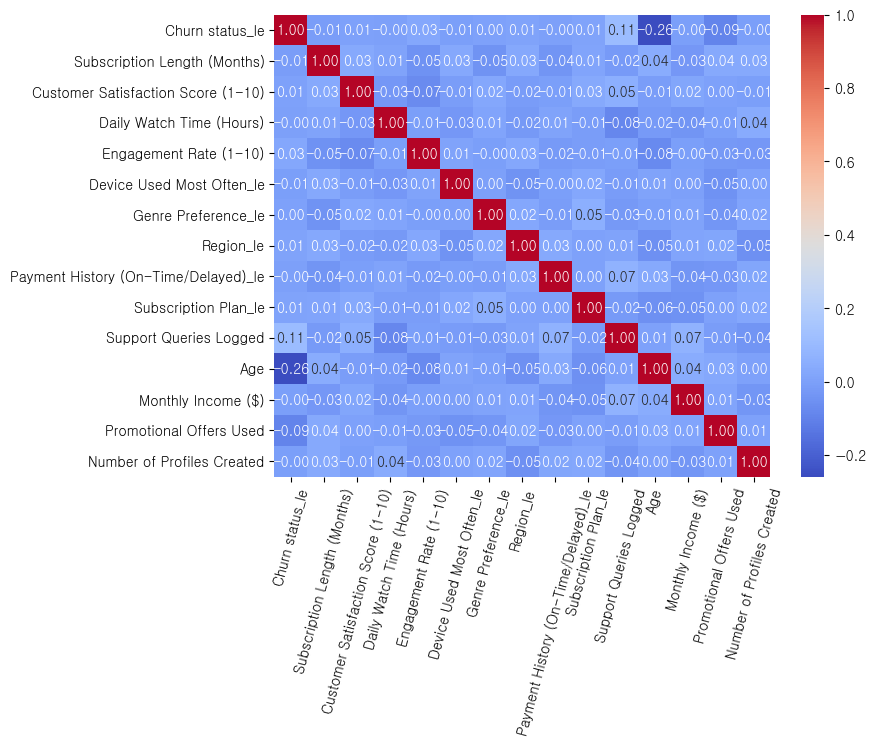

In [318]:
heat_map_columns = [
'Churn status_le',
'Subscription Length (Months)',
'Customer Satisfaction Score (1-10)',
'Daily Watch Time (Hours)',
'Engagement Rate (1-10)',
'Device Used Most Often_le',
'Genre Preference_le',
'Region_le',
'Payment History (On-Time/Delayed)_le',
'Subscription Plan_le',
'Support Queries Logged',
'Age',
'Monthly Income ($)',
'Promotional Offers Used',
'Number of Profiles Created'
]
# 상관계수 히트맵
heat_map_corr = df[heat_map_columns].corr()
plt.figure(figsize=(8,6))
sns.heatmap(heat_map_corr, annot=True, cmap="coolwarm", fmt=".2f")
# plt.title("상관계수 히트맵 : 로그화된 리뷰 수 컬럼과 가격의 상관 관계 분석")
plt.xticks(rotation=75) 
plt.show()

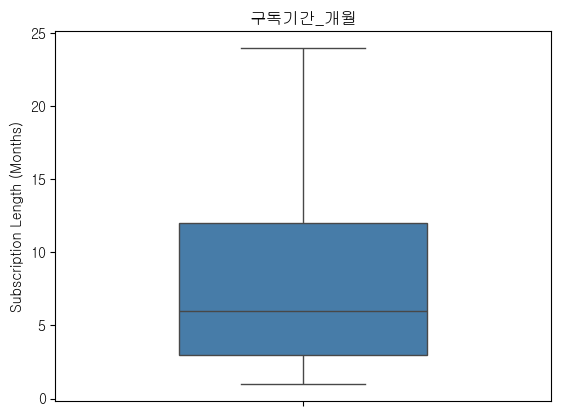

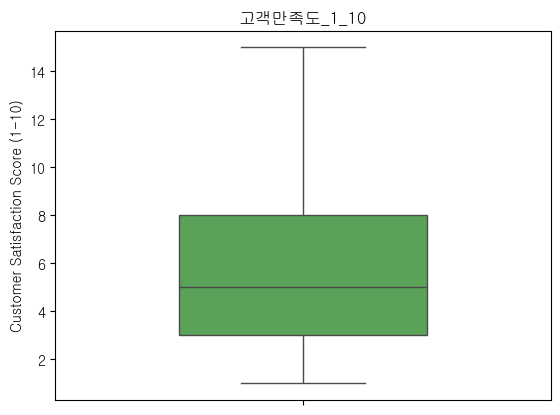

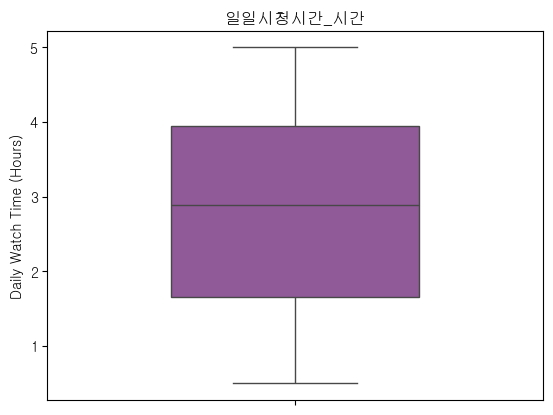

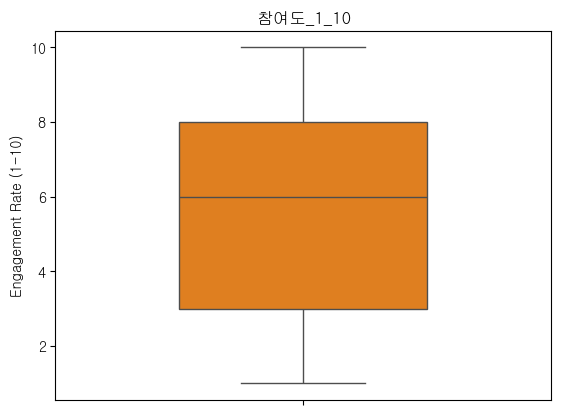

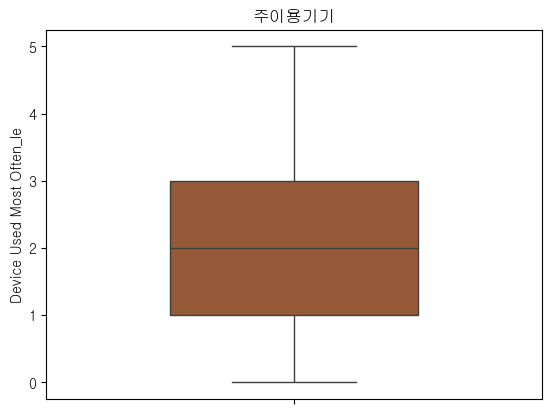

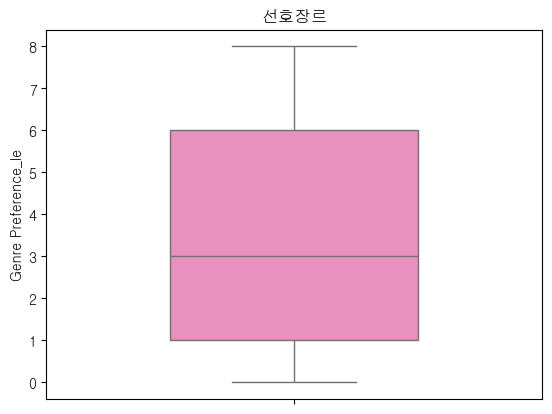

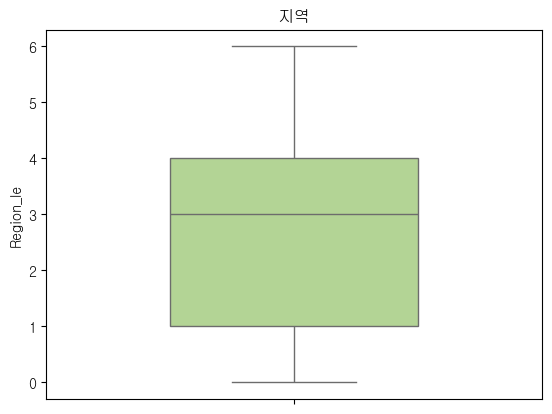

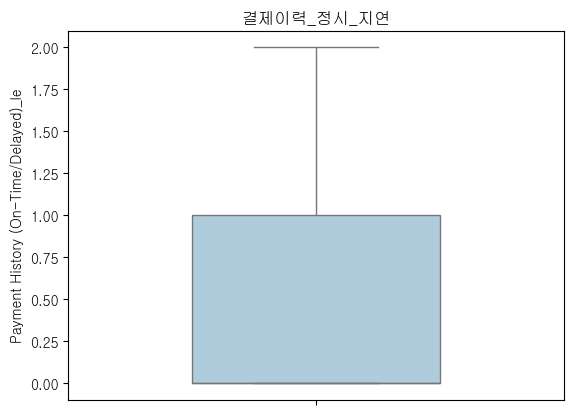

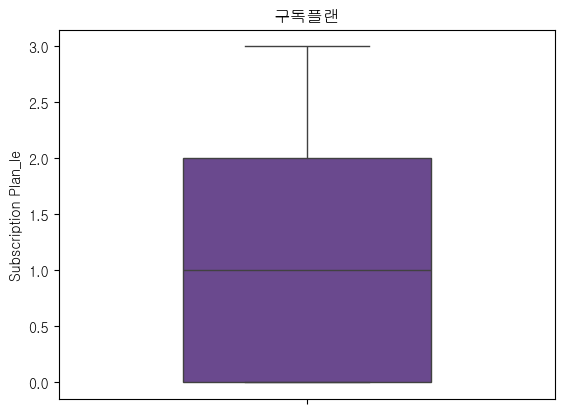

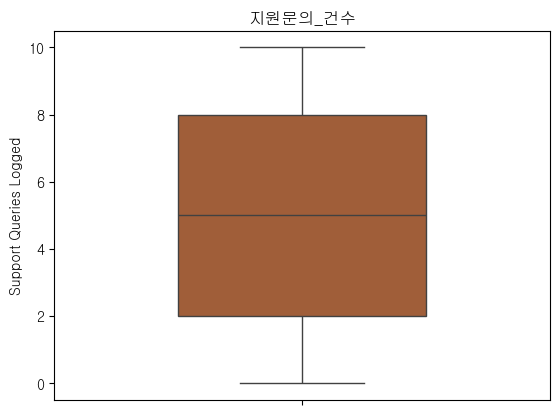

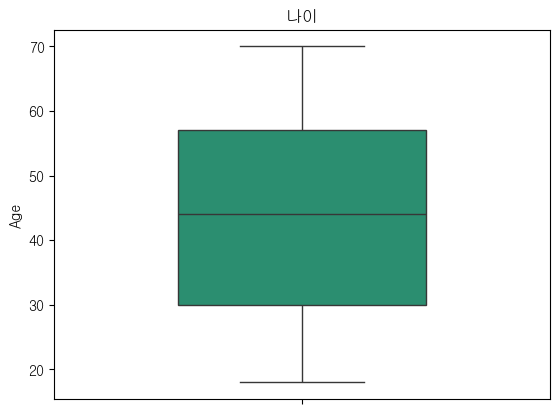

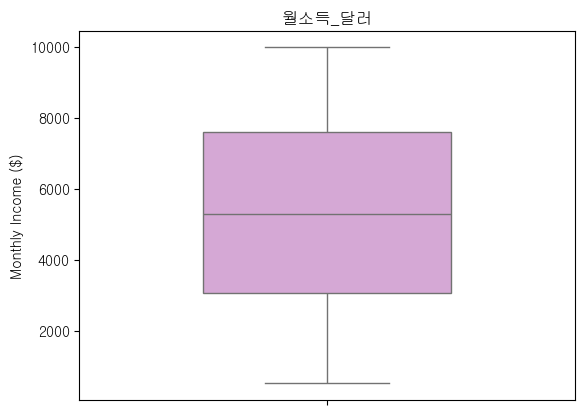

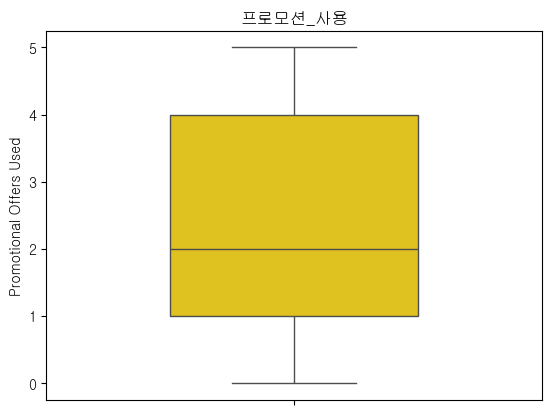

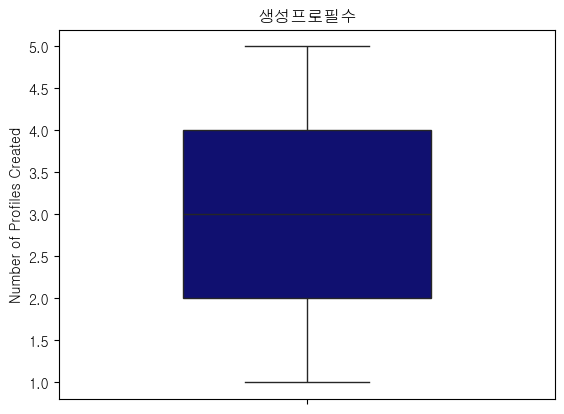

In [320]:

lst = [
    ('#377EB8', 'Subscription Length (Months)')
    ,('#4DAF4A', 'Customer Satisfaction Score (1-10)')
    ,('#984EA3', 'Daily Watch Time (Hours)')
    ,('#FF7F00', 'Engagement Rate (1-10)')
    ,('#A65628', 'Device Used Most Often_le')
    ,('#F781BF', 'Genre Preference_le')
    ,('#B2DF8A', 'Region_le')
    ,('#A6CEE3', 'Payment History (On-Time/Delayed)_le')
    ,('#6A3D9A', 'Subscription Plan_le')
    ,('#B15928', 'Support Queries Logged')
    ,('#1B9E77', 'Age')
    ,('#DDA0DD', 'Monthly Income ($)')
    ,('#FFD700', 'Promotional Offers Used')
    ,('#000080', 'Number of Profiles Created')
]


for i, (color, col_name) in enumerate(lst):
    sns.boxplot(
        y=df[col_name],
        # ax=axes[row, col],
        color=color,
        width=0.5,
        flierprops=dict(
            marker='o', markerfacecolor=color, markersize=5, 
                markeredgewidth=0.8, alpha=0.9
        )
    )
    plt.title(rename_map[col_name.replace('_le','')])
    plt.show()

## ## 6. 데이터 정제 및 전처리 (2차)

## ## 7. 데이터 변환 및 피처 엔지니어링


## ## 8. 데이터 분할